# Fourier級数

$\newcommand{\im}{\mathrm{i}}$

ある関数 $f(x)$ ($x\in[0,2\pi]$) を周期 $2\pi$ の周期関数 (任意の $x\in\mathbb{R}$ に対して、$f(x)=f(x+L)$ となる関数を周期 $L$ の周期関数という) とする。
このとき

$$
	f(x)=\frac{a_0}{2}+\sum_{n=1}^{\infty}a_n\cos(nx)+\sum_{n=1}^{\infty}b_n\sin(nx),
$$

となる無限級数を**フーリエ級数**という。ここで $a_n , b_n$ はフーリエ係数といい

\begin{align*}
%a_0&=\frac{1}{2\pi}\int_0^{2\pi}f(x)dx,\\
a_n&=\frac{1}{\pi}\int_0^{2\pi}f(x)\cos(nx)dx,\quad n\ge 0,\\
b_n&=\frac{1}{\pi}\int_0^{2\pi}f(x)\sin(nx)dx,\quad n\ge 1
\end{align*}

で定められる。また、$\cos(nx) = \frac{e^{\im nx} + e^{-\im nx}}2$, $\sin(nx)=\frac{e^{\im nx} - e^{-\im nx}}{2\im}$ ($\im = \sqrt{-1}$ は虚数単位) という関係を用いて

$$
	f(x)=\sum_{k=-\infty}^{\infty}c_k e^{\im k x},\quad c_k=\frac{1}{2\pi}\int_0^{2\pi}f(x)e^{-\im k x}dx
$$

と複素数を用いた形式も考えられる。これを複素フーリエ級数、$c_k$ を複素フーリエ係数という。これらには関係式

$$
\begin{aligned}
c_{0} &=a_{0}, \quad k=0 \\
c_{k} &= \begin{cases}\left(a_{k}-i b_{k}\right) / 2, & k>0 \\
\left(a_{-k}+i b_{-k}\right) / 2, & k<0\end{cases}
\end{aligned}$$

があり、変換可能である。

## Fourier級数の性質



### 1. 対称性

周期関数 $f(x)$ が、偶関数の性質

$$
    f(x) = f(-x)
$$

を満たすとすると、サインの係数 $ b_n $ が

$$
    b_n = 0
$$

になるので、この関数のフーリエ級数は、

$$
    f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty}a_n\cos(nx)
$$

と表すことができる。このようにコサイン関数のみで表されるフーリエ級数のことを**フーリエ・コサイン級数**と言う。このとき $c_{-k} = c_k$ も成り立つ。


一方で、$f(x)$が、奇関数の性質

$$
    f(x) = -f(-x)
$$

を満たすとすると、コサインの係数 $ a_n $ が

$$
    a_n = 0
$$

になるので、この関数のフーリエ級数は、
$$
    f(x) = \sum_{n=1}^{\infty}b_n\sin(nx)
$$

と表すことができる。このようにサイン関数のみで表されるフーリエ級数のことを**フーリエ・サイン級数**と言う。このとき $c_{-k}=-c_k$も成り立つ。


### 2. 実数値関数

$f(x)$ が実数値関数 $f(x) \in \mathbb{R}$ であるとき、フーリエ係数 $a_n$, $b_n$ は

$$
    a_n , b_n \in \mathbb{R}
$$

となる。更に、複素フーリエ係数 $c_k$ は、

$$
    c_{-k} = \overline{c_{k}}
$$

を満たす。これは、$f(x) = \overline{f(x)}$ という条件を使うことで確認できる。

### 3. 係数の収束

ある周期関数のフーリエ係数を $a_n$ とおく。このとき、$ n \rightarrow \infty $での収束のオーダーは

$$
    a_n = 
    \begin{cases}
    \mathcal{O}(n^{-k}) & \text{$k$ 次オーダーの収束} \\
    \mathcal{O}(e^{-qn^r}) & \text{$q$ : 定数 , $r>0$ , 指数オーダーの収束} \\
    \mathcal{O}(e^{-qb\log(n)}) & \text{超幾何収束}
    \end{cases}
$$

などのパターンがあり、それぞれ周期関数 $f(x)$ の滑らかさによって決まる。例えば、$f(x)$ が $k$ 次オーダーの収束をする場合は、関数 $f$ は $C^k$-級（$k$ 階連続微分可能）の関数である。

指数オーダーの収束をする場合は、3種類のパターンがある。
r=1のときは。極や分岐点(?)を持つ一般的な関数を有限区間で展開した場合である。
r<1のときは、極や分岐点を持つ一般的な関数を無限区間または、半無限区間で展開した場合である。
r>1のときは、・・・


超幾何収束は、複素平面上で$\infty$以外で特異点を持たない関数(整関数, entire function)の場合である。? p.26

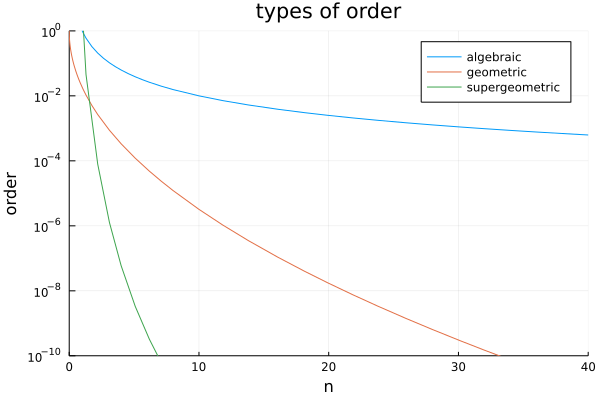

In [2]:
using Plots

k = 2
q = 4
r = 0.5
b = 3


g_1(n) = n^(-k)
g_2(n) = exp(-q*n^r)
g_3(n) = exp(-q*b*log(n))

plot(n -> g_1(n),
    yaxis = :log,
    xlims = (0,40),
    ylims = (10^(-10),10^0),
    xlabel = "n",
    ylabel = "order",
    title = "types of order",
    label = "algebraic")

plot!(n -> g_2(n),
    label = "geometric")
plot!(n -> g_3(n),
    label = "supergeometric")

### 4. その他の便利な性質

- 微分が簡単

$$
    \frac{d}{dx} f(x) = \sum_{k=-\infty}^{\infty} (\im k)c_k e^{\im kx}
$$

- シフトも簡単

$$
    f(x-d) = \sum_{k=-\infty}^{\infty}c_ke^{\im k(x-d)} = \sum_{k=-\infty}^{\infty}(e^{-\im kd})c_ke^{\im kx}
$$

元の係数 $c_k$ に $ik$ や $e^{\im kd}$ を掛けるだけで演算ができる。

### フーリエ係数の計算方法

周期関数 $f(x)$ のフーリエ係数 $c_k$ を求める。フーリエ係数の添字のサイズ $N$ を $|k|<N$ となるように定める（$N-1$ を最大波数ともいう）。

このとき、$0 = x_0\le x_1\le \dots \le x_{2N-1}=2\pi$ と区間 $[0,2\pi]$ を等間隔に分割した点 $x_j = jh$ ($j = 0,\dots,2N-1$, $h=2\pi/(2N-1)$) を標本点といい、標本点上での関数値を用いて次のようなフーリエ係数の近似を得る。

$$
c_k = \frac{1}{2\pi}\int_0^{2\pi}f(x)e^{-\im k x}dx\approx \frac1{2N-1}\sum_{j=0}^{2N-2} f(x_j) e^{-2\pi \im\frac{kj}{2N-1}}=\bar{c}_k,\quad (|k|<N).
$$

この $\bar{c}_k$ の式は、離散フーリエ変換 ($ a_k = \mathcal{F}_k(b) = \sum_{j=0}^{2M-2}b_j e^{-2\pi \im \frac{jk}{2M-1}}$) によく似ている。


近似されたフーリエ係数 $\bar{c}_k$ を使って、元の関数 $f(x)$ の近似が

$$
f^{(N)}(x) = \sum_{|k|<N} \bar{c}_k e^{\im k x}.
$$

と得られる。

係数の式が離散フーリエ変換に似ていることを活かして、高速フーリエ変換(FFT)を使って係数を求める。例えば、$f(x)=\frac{\exp(\sin(5x))}{1+\sin(\cos(x))}$ として、$N=100$ のときのフーリエ係数の近似は次のように得る。

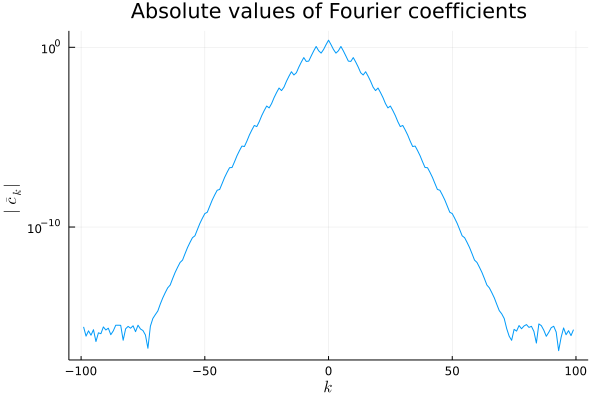

In [45]:
using FFTW, Plots
f(x) = exp(sin(5x))/(1+sin(cos(x)))
# g(x) = sin(x^3*(x-2π)^2/10)
N = 100;

function fouriercoeffs(f,N)
    h = 2.0π/(2N-1)
    xⱼ = h*(0:2N-2)
    fⱼ = f.(xⱼ);
    return fftshift(fft(fⱼ))/(2N-1)
end

cₖ = fouriercoeffs(f,N)

plot(-N+1:N-1,abs.(cₖ),yscale=:log10,
    legend=false,
    xlabel = "\$k\$",
    ylabel = "\$|\\bar{c}_k\\,|\$",
    title = "Absolute values of Fourier coefficients"
)

### フーリエ係数から元の関数の概形を求める

関数 $f^{(N)}(x)$ の係数 $\bar{c}_k$ から元の関数をプロットしたい。いま標本点上での関数値は

$$
f^{(N)}(x_j) = \sum_{|k|<N} \bar{c}_k e^{\im k x_j} = \sum_{|k|<N} \bar{c}_k e^{2\pi\im \frac{kj}{2N-1}}.
$$

これは逆離散フーリエ変換相当する。そこで逆高速フーリエ変換(IFFT)を用いて元の関数を求める。しかし、このままIFFTを用いると、標本点と同じ数の関数値しか得られず、グラフに描画するといびつになってしまう。これを解消するために、フーリエ係数 $\bar{c}_k$ に $0$ を余分に貼り合わせて (paddingという) 、滑らかなグラフを得る。

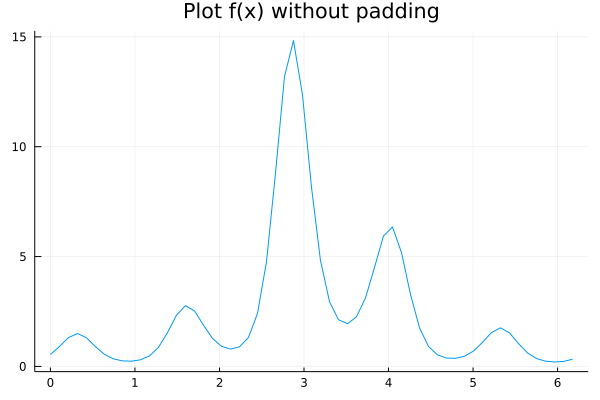

In [61]:
#paddingなし、N=30
f(x) = exp(sin(5x))/(1+sin(cos(x)))
N = 30
cₖ = fouriercoeffs(f,N)
h = 2.0π/(2N-1); xⱼ = h*(0:2N-2)

fᴺⱼ = real((2N-1)*ifft(ifftshift(cₖ)))
plot(xⱼ, fᴺⱼ,
    legend = false,
    title = "Plot f(x) without padding"
)

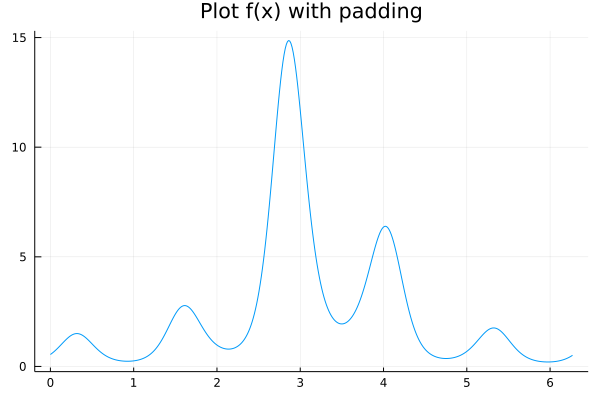

In [68]:
#paddingあり
function plot_fourier(cₖ)
    N = (length(cₖ)+1)/2# 2N-1
    n_pad = 200
    cₖ_pad = [zeros(n_pad);cₖ;zeros(n_pad)]
    N_pad = N + n_pad
    h_pad = 2.0π/(2N_pad-1)
    xⱼ_pad = h_pad*(0:2N_pad-2)
    
    fᴺⱼ_pad = real((2N_pad-1)*ifft(ifftshift(cₖ_pad)))
    plot(xⱼ_pad, fᴺⱼ_pad, legend=false, title = "Plot f(x) with padding")
end

plot_fourier(cₖ)

ここで、係数$c_k$を求めるところから元の関数をプロットする一連の流れを関数にしてみる。

これを元に$f(x)$と$\bar{f}(x)$を比較してみると

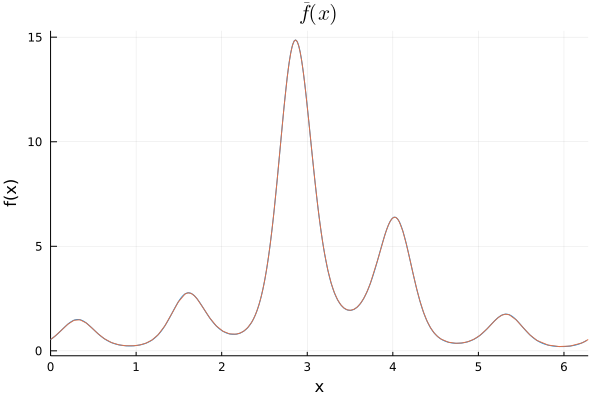

In [69]:
plot!(x -> f(x),
    xlabel = "x",
    ylabel = "f(x)",
    xlims = (0,2pi),
    title = "\$\\bar{f}(x)\$",
    legend = false
)    

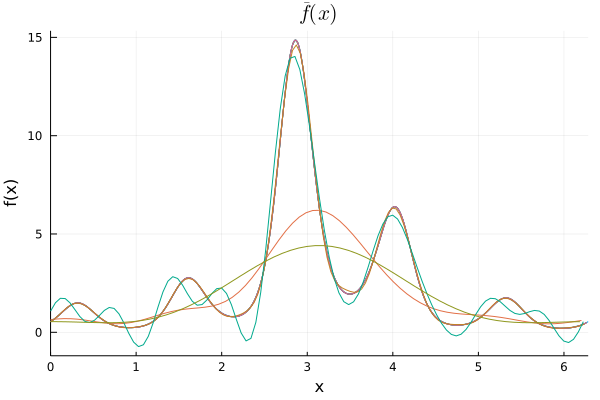

In [18]:
# using ApproxFun
# #フーリエ級数の項数を5,10,20,30と変化させて、実際のf(x)と比べてみる。
# a = Fun(x -> f(x), Fourier(0..2pi), 5)
# plot!(a)

ApproxFunというライブラリを用いてフーリエ級数展開した。近似式と$f(x)$は全く一緒になった。

## スペクトル法

フーリエ級数は無限級数であるが、コンピュータ上では無限を表現することはできない。そのため、コンピュータ上でフーリエ級数を扱う場合は、無限級数を有限個で打ち切る必要がある。このような有限項のフーリエ級数（三角多項式, trigonometric polynomial）を使った数値計算の方法を**スペクトル法**という。

#### Fourier多項式のスペクトル法

$x \in (0 , L)$上の周期関数

$$
    f(x) = \sum_{k=-N}^{N}c_k e^{\im k \omega x}, \quad \omega = \frac{2\pi}{L}
$$

このとき、$N$を**最大波数・切断波数**という。

**例**

$$
    u_t + u_x = 0
$$

という方程式を

$$
    u(t,x) \approx \sum_{|k| \leq N}a_k(t)e^{\im k \omega x}
$$

を用いて近似すると

$$
      \frac{d}{dt}a_k(t) + \im k \omega a_k(t) = 0, \quad |k| \leq N
$$

と書ける。これを空間$x$のスペクトル離散化という。

### メリット

- 離散化誤差がなく、打切り誤差のみ　$\rightarrow$　解が滑らかならば高精度
- PDE/DDEをODE/代数方程式のように解くことができる。微分・シフトを代数操作に変換できる。
- FFTのおかげで数値的に安定して係数を決定できる。

### デメリット

- 境界条件、領域の形状が限られる。
- 展開係数と分点上の物理量が対応してない。(変換のコストがかかる)
- 非線形項が扱いづらい　$\rightarrow$　FFTを用いて克服可能！

### 参考文献

1. Boyd, ....
1. Wikipedia..